In [41]:
import pandas as pd

column_names = ['ISREGISTER', 'USERTYPE', 'USERBROWSER', 'JOINMETHOD', 'SYSTEM', 'LABEL']
df = pd.read_csv("/Users/cisco/workspace/mygit/daily-learning-python/decision_tree/data/test.csv", sep=",",
                 names=column_names)

dummies_ISREGISTER = pd.get_dummies(df['ISREGISTER'], prefix='ISREGISTER')
dummies_USERTYPE = pd.get_dummies(df['USERTYPE'], prefix='USERTYPE')
dummies_USERBROWSER = pd.get_dummies(df['USERBROWSER'], prefix='USERBROWSER')
dummies_JOINMETHOD = pd.get_dummies(df['JOINMETHOD'], prefix='JOINMETHOD')
dummies_SYSTEM = pd.get_dummies(df['SYSTEM'], prefix='SYSTEM')

jmt_feature = pd.concat(
    [dummies_ISREGISTER, dummies_USERTYPE, dummies_USERBROWSER, dummies_JOINMETHOD, dummies_SYSTEM], axis=1)
jmt_target = df.loc[:, ['LABEL']]

# 划分训练集和测试集
from sklearn.cross_validation import train_test_split

cls_feature_train, _, category_train, _ = train_test_split(jmt_feature, jmt_target,test_size=0, random_state=1)

In [43]:
cls_feature_train

,ISREGISTER_False,ISREGISTER_True,USERTYPE_NEW,USERTYPE_RETURN,USERTYPE_UPDATE,USERBROWSER_Chrome,USERBROWSER_IE,USERBROWSER_Other,JOINMETHOD_ActiveX,JOINMETHOD_Extension,SYSTEM_Spark,SYSTEM_Webex
2,1,0,0,1,0,1,0,0,0,1,1,0
1,0,1,0,1,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,1,0,1,0,1,0
0,0,1,0,1,0,0,0,1,0,1,0,1
3,0,1,1,0,0,1,0,0,0,1,1,0
5,1,0,0,0,1,0,1,0,1,0,0,1


In [45]:
# cart数训练。entropy 为信息增益
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier(criterion='gini', max_depth=5)
cart.fit(cls_feature_train, category_train)
cls_feature_train.columns.values

array(['ISREGISTER_False', 'ISREGISTER_True', 'USERTYPE_NEW',
       'USERTYPE_RETURN', 'USERTYPE_UPDATE', 'USERBROWSER_Chrome',
       'USERBROWSER_IE', 'USERBROWSER_Other', 'JOINMETHOD_ActiveX',
       'JOINMETHOD_Extension', 'SYSTEM_Spark', 'SYSTEM_Webex'], dtype=object)

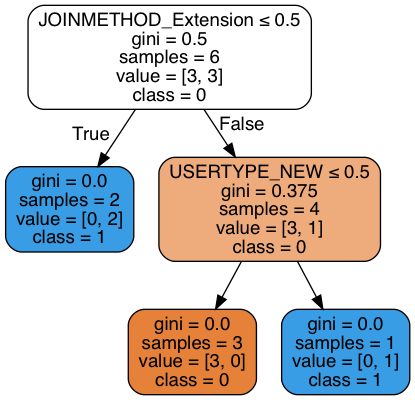

In [46]:
# 画图
# 结果展示
from IPython.display import Image
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()
tree.export_graphviz(cart, out_file=dot_data,
                     feature_names=['ISREGISTER_False', 'ISREGISTER_True', 'USERTYPE_NEW',
       'USERTYPE_RETURN', 'USERTYPE_UPDATE', 'USERBROWSER_Chrome',
       'USERBROWSER_IE', 'USERBROWSER_Other', 'JOINMETHOD_ActiveX',
       'JOINMETHOD_Extension', 'SYSTEM_Spark', 'SYSTEM_Webex'],
                     class_names=['0', '1'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())